# Practical session 3 - Brownian motion, Fourier transform

Students (pair):
- [OUMOUHOU Hicham 1](https://github.com/hichamomh)
- [CHADLI Mohammed Amine 2](https://github.com/MACnCH)

```
conda create --name=lab3 --file=requirement.txt
conda activate lab3
# do not forget to deactivate the environment if needed
# you can remove the environment once you are done
conda env remove --name=lab3
```

In [ ]:
%load_ext autoreload
%autoreload 2


## <a name="ex1">Exercise 1: Brownian motion</a>

This first exercise consists in generating a Brownian motion on the closed unit ball $\mathcal{B}(\mathbf{0}, 1) = \{ \mathbf{x} \mid \Vert \mathbf{x} \Vert  \leq 1\}$, focusing first on the 2-D case. The Brownian motion is a random walk with independent, identically distributed Gaussian increments, appearing for instance in thermodynamics and statistical mechanics (to model the evolution of a large particle in a medium composed of a large number of small particles, ...). It is also connected to the diffusion process (Einstein).

Let $N \in \mathbb{N}^*$, $\delta > 0$, and $\mathbf{x} = (x_1, x_2) \in  \mathcal{B}(\mathbf{0}, 1)$. The first $N$ steps of a 2-D discrete-time Brownian motion $W$ can be generated as follows

\begin{align*}
    W_0 &= \mathbf{x}, \\
    %
    (\forall n \in \{1, \dotsc, N-1 \}), \quad W_n &= W_{n−1} + \sqrt{\delta} G_n, \quad G_n \sim \mathcal{N}(\mathbf{0}, \mathbf{I}),
\end{align*}

where $\mathcal{N}(\mathbf{0}, \mathbf{I})$ is a Gaussian distribution with mean $\mathbf{0}$ and identity covariance matrix.

1. Define a random generator `rng`, set to a known state for reproducibility (see session 2).

**Answer:**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
rng = np.random.RandomState(50)


In [4]:
rng.normal(0,1,size=(2,))


array([-1.56035211, -0.0309776 ])

2. Implement a function `brownian_motion(niter, x, step, rng)` which

    - simulates $W$ until it reaches the boundary of $\mathcal{B}(\mathbf{0}, 1)$, using a maximum of $N$ iterations (`niter`), a starting point $\mathbf{x} \in \mathcal{B}(\mathbf{0}, 1)$ (`x`) and step-size $\delta$ (`step`);
    - interpolates linearly between the two last positions to determine the points $W^*$ where the trajectory crosses the boundary (if applicable);
    - returns both the whole random walk $W$ and, if appropriate, the point at the intersection between the last segment of the trajectory and $\mathcal{B}(\mathbf{0}, 1)$.
 
> Hint: 
> - you can easily derive a closed form expression for $W^*$, observing that $\Vert W^* \Vert^2= 1$ and $W^* \in [W_{n-1}, W_n]$. 
> - you can also take a look at [`np.roots`](https://numpy.org/doc/stable/reference/generated/numpy.roots.html?highlight=roots#numpy.roots) if needed.

> Recall of the Linear Interpolation (LERP) for $n$-dimensional vectors:
> - Clearly, $\vec{D}=\alpha \vec{C}$ with $\alpha \in [0, 1]$ and hence $\vec{P}-\vec{B}= \alpha (\vec{A}-\vec{B})$ which is equivalent to $\vec{P}= (1-\alpha) \vec{B} + \alpha \vec{A}$. 
![alternatvie text](img/for_Course.png)

**Answer:**

Observing that $\Vert W^* \Vert^2= 1$ and $W^* \in [W_{n-1}, W_n]$. so we have:
$$ x^2 + y^2 = 1 $$
$$ x = \frac{x_n - x_{n-1}}{y_n - y_{n-1}} (y - y_{n-1}) + x_{n-1}$$
So we can get the $y$ coordinate of $W^*$ by solving the equation:
$$ y^2 + (\frac{x_n - x_{n-1}}{y_n - y_{n-1}} (y - y_{n-1}) + x_{n-1})^2 = 1 $$


In [15]:
def point_intersection(W):
    """Finds the intersection of the line between the last two points in W and the boundary of the unit sphere.
    Args:
        W: list of points
    Returns:
        x,y: coordinates of the intersection point
    """
    alpha = (W[-1][0] - W[-2][0]) / (W[-1][1] - W[-2][1])
    c = W[-2][0]-W[-2][1]*alpha
    P = [alpha**2+1, 2*alpha*c, c**2-1]
    y = np.roots(P)
    x = c+y*alpha

    for i in range(len(x)):
        if  min(W[-2][0],W[-1][0])<=x[i]<=max(W[-2][0],W[-1][0]) and min(W[-2][1],W[-1][1])<=y[i]<=max(W[-2][1],W[-1][1]):
            return(x[i],y[i])


In [16]:
def brownian_motion(niter, x, step, rng):
    """Simulates a Brownian motion starting at x.
    Args:
        niter: number of iterations
        x: starting point
        step: step size
        rng: random number generator
    Returns:
        W: list of points

    """
    W  = [x]
    for i in range(niter):
        if np.sum(np.array(W[-1])**2) > 1:
            return(np.array(W))
        next_x = W[-1] + np.sqrt(step) * rng.normal(0,1,size=(len(x),))
        W.append(next_x)

    return(np.array(W))


In [8]:
niter = 1000
step = 0.08
x = np.array([0,0])
W  = brownian_motion(niter, x, step, rng)


In [9]:
W_star= point_intersection(W)
print(np.sum(np.array(W_star)**2))
print(W_star)


0.9999999999999999
(0.30820768624275396, 0.951319095856321)


3. Diplay the trajectory of a Brownian motion starting from $\mathbf{x} = (0.2, 0.4)$, using $\delta = 10^{-2}$, $N = 1000$. Display the unit circle on the same figure, and highlight the intersection with the boundary of the domain (whenever it exists).

> Hint: to draw the unit disk, you can use for instance:
> ```python
> circle = plt.Circle((0,0), 1)
> fig, ax = plt.subplots()
> plt.xlim(-1.25,1.25)
> plt.ylim(-1.25,1.25)
> plt.grid(linestyle = "--", zorder = 1)
> ax.set_aspect(1)
> ax.add_artist(circle)
> ```

**Answer:**

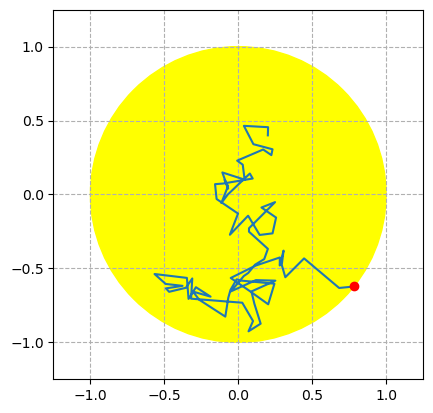

In [12]:
circle = plt.Circle((0,0), 1,color="yellow")
fig, ax = plt.subplots()
plt.xlim(-1.25,1.25)
plt.ylim(-1.25,1.25)
plt.grid(linestyle = "--", zorder = 1)
ax.set_aspect(1)
ax.add_artist(circle)

niter = 1000
step = 0.01
x = np.array([0.2,0.4])
W  = brownian_motion(niter, x, step, rng)
(x_inter,y_inter) = point_intersection(W)
plt.plot(W[:,0],W[:,1])
plt.scatter(x_inter,y_inter, color="red", zorder = 2)


4. Represent, on the same figure, 4 other trajectories of $W$ with the same parameters.

**Answer:**

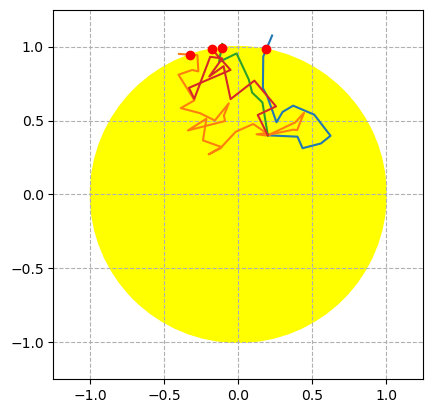

In [13]:
circle = plt.Circle((0,0), 1,color="yellow")
fig, ax = plt.subplots()
plt.xlim(-1.25,1.25)
plt.ylim(-1.25,1.25)
plt.grid(linestyle = "--", zorder = 1)
ax.set_aspect(1)
ax.add_artist(circle)

niter = 1000
step = 0.01
x = np.array([0.2,0.4])

for i in range(4):
    W  = brownian_motion(niter, x, step, rng)
    (x_inter,y_inter) = point_intersection(W)
    plt.plot(W[:,0],W[:,1])
    plt.scatter(x_inter,y_inter, color="red", zorder = 2)


5. [Bonus] Generalize the procedure to a $M$-dimensional Brownian motion, $M > 2$.

**Answer:**

The point of intersection between the line defind by the two points $A$ and $B$ and the sphere is  : $$\vec{P}= (1-\alpha) \vec{B} + \alpha \vec{A} $$
where : 
$$ \vec{P}-\vec{B}= \alpha (\vec{A}-\vec{B})$$

To find this $\alpha$ we can bring this problem in the space defind by the two points $A$ and $B$ and the origin $O$ (because $\alpha$ do not depend on the dimension) and then use the same methods as in the 2D case.

In [17]:
def point_intersection_n(W):

    """Finds the intersection of the line between the last two points in W and the boundary of the unit sphere.
    Args:
        W: list of points
    Returns:
        X: vecteur present the coordinates of the intersection point

    """
    distance = np.sqrt(np.sum((W[-1]-W[-2])**2))
    norm_W1 = np.sqrt(np.sum(W[-1]**2))
    norm_W2 = np.sqrt(np.sum(W[-2]**2))
    first_point = np.array([norm_W2,0])

    x = (norm_W1**2-norm_W2**2-distance**2)/(2*norm_W2)
    y = np.sqrt(distance**2-x**2)


    second_point = np.array([norm_W2+x,y])

    third_point = point_intersection([first_point,second_point])

    alpha = np.abs(np.sqrt(np.sum((third_point-first_point)**2)/np.sum
    ((second_point-first_point)**2)))

    return(alpha*W[-1]+(1-alpha)*W[-2])


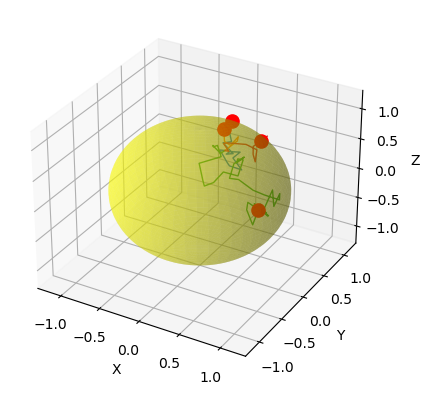

In [157]:
# Création de la figure en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Tracé du cercle en 3D
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x_circle = np.outer(np.cos(u), np.sin(v))
y_circle = np.outer(np.sin(u), np.sin(v))
z_circle = np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(x_circle, y_circle, z_circle, color='yellow', alpha=0.4)

for i in range(4):
    x = [0.2,0.2,0.6]
    step = 0.01
    N = 1000
    W = brownian_motion(N, x, step, rng)
    x,y,z = point_intersection_n(W)

    # Tracé de la trajectoire en 3D
    ax.plot(W[:, 0], W[:, 1], W[:, 2], linewidth=1)

    # Marquage du point d'intersection en 3D
    ax.scatter(x, y, z, color='red', s=90)

    # Réglages de l'axe
    ax.set_xlim(-1.25, 1.25)
    ax.set_ylim(-1.25, 1.25)
    ax.set_zlim(-1.25, 1.25)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')


---
## <a name="ex2">Exercise 2: 2D Fourier transform, ideal low-pass filter and linear convolution</a>

In this exercise, we explore the use of the 2-dimensional Fourier transform to filter an image, and convolve it with a blurring kernel.

1\. Load and display one of the images contained in the `img/` folder. The image will be denoted by $\mathbf{X} \in \mathbb{R}^{M_1 \times N_1}$ in the rest of this exercise.

**Answer:**

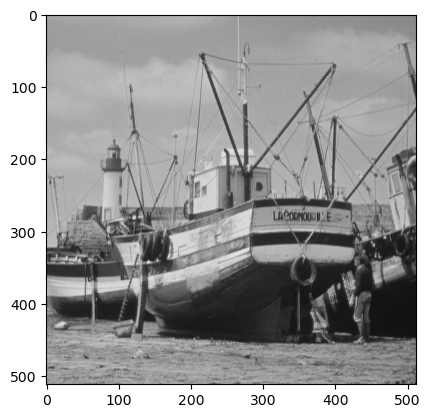

In [18]:
from PIL import Image
image = Image.open("img/boat.png")
plt.imshow(image)
plt.axis('on')  # Hide axis
plt.show()


2\. Let $\mathcal{F}$ denote the 2D discrete Fourier transform. Compute $|\mathcal{F}(\mathbf{X})|^2$, the spectrum of the image $\mathbf{X} \in \mathbb{R}^{M_1 \times N_1}$ (i.e., the term-wise squared absolute value of its Fourier transform) loaded in 1. Display the result in logarithmic scale.

a) In this representation, where is the pixel of the spectrum associated with the null frequency located?
    
b) Take a look at the documentation of `np.fft.fftshift`. Use it to ensure that the null frequency is located at the center of the image. 

**Answer:**

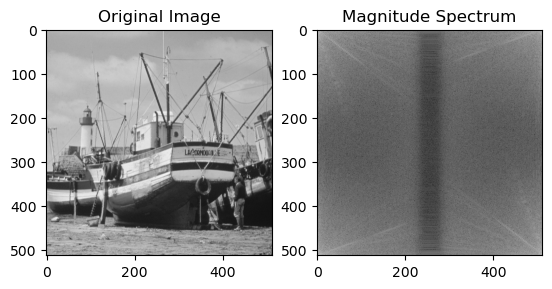

In [19]:
import scipy.fft
X = np.array(image) #Image transformed into  numpy array
fourier_transform = scipy.fft.fft2(X)
magnitude_spectrum = np.abs(fourier_transform)**2
plt.subplot(121), plt.imshow(X, cmap='gray')
plt.title('Original Image')
plt.subplot(122), plt.imshow(np.log(magnitude_spectrum), cmap='gray')
plt.title('Magnitude Spectrum')
plt.show()


2-a The pixel of the spectrum associated with the null frequency is located in borders of the image 

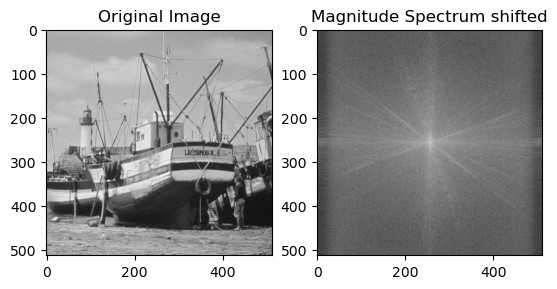

In [20]:
# Shift the zero frequency component to the center
fourier_transform_shifted = scipy.fft.fftshift(fourier_transform)
magnitude_spectrum = np.abs(fourier_transform_shifted)**2
plt.subplot(121), plt.imshow(X, cmap='gray')
plt.title('Original Image')
plt.subplot(122), plt.imshow(np.log(magnitude_spectrum), cmap='gray')
plt.title('Magnitude Spectrum shifted')
plt.show()


2-b The pixel of the spectrum associated with the null frequency is located in the center of the picture magnitude spectrum  


3\. 
    a) Create a function `ideal_lowpass_filter` to filter $\mathbf{X}$ by an ideal low-pass filter. The filter preserves Fourier coefficients associated to frequencies below a cutoff specified in each direction ($\mathbf{f}_c = (f_{c,y}, f_{c,x})$), and sets others to zero. For simplicity, $f_{c,y}$ and $f_{c,x}$ can be expressed as a number of samples to be kept along each dimension (e.g., $\mathbf{f}_c = (50,50)$).

b) Display the filtered image for 2 different values of $\mathbf{f}_c$. What do you observe as the cutoff frequencies increase?
    
> Warning: beware the type of the array after `np.fft.fft2`, do not hesitate to specify the type if you make copies from this array
> ```python
> a = np.zeros((2,2), dtype=np.complex)
> ...
> ```

**Answer:**

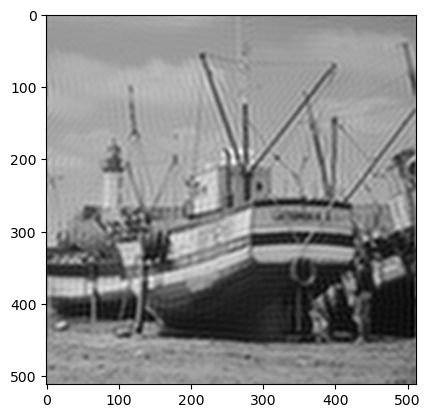

In [21]:
def ideal_lowpass_filter(X, fc):
    """
    Applies an ideal low-pass filter to the input image X.
    Args:
        X: input image
        fc: cut-off frequency
    Returns:
        filtered_image: output image
    """

    # Perform 2D Fourier transform on the input image
    f_transform = np.fft.fft2(X)

    # Shift the zero frequency component to the center
    f_transform_shifted = np.fft.fftshift(f_transform)

    # Get the shape of the image and the center coordinates
    rows, cols = X.shape
    center_y, center_x = rows // 2, cols // 2

    # Create a mask for the ideal low-pass filter
    mask = np.zeros_like(X)
    fcy, fcx = fc
    mask[center_y - fcy:center_y + fcy, center_x - fcx:center_x + fcx] = 1.0

    # Apply the mask to the Fourier transform
    filtered_f_transform = f_transform_shifted * mask

    # Shift the zero frequency component back to the corner
    filtered_f_transform_shifted = np.fft.ifftshift(filtered_f_transform)

    # Inverse Fourier transform to get the filtered image
    filtered_image = np.fft.ifft2(filtered_f_transform_shifted)

    # Take the real part of the result
    filtered_image = np.abs(filtered_image)
    return filtered_image


Result = ideal_lowpass_filter(X,(50,50))
plt.imshow(Result, cmap='gray')


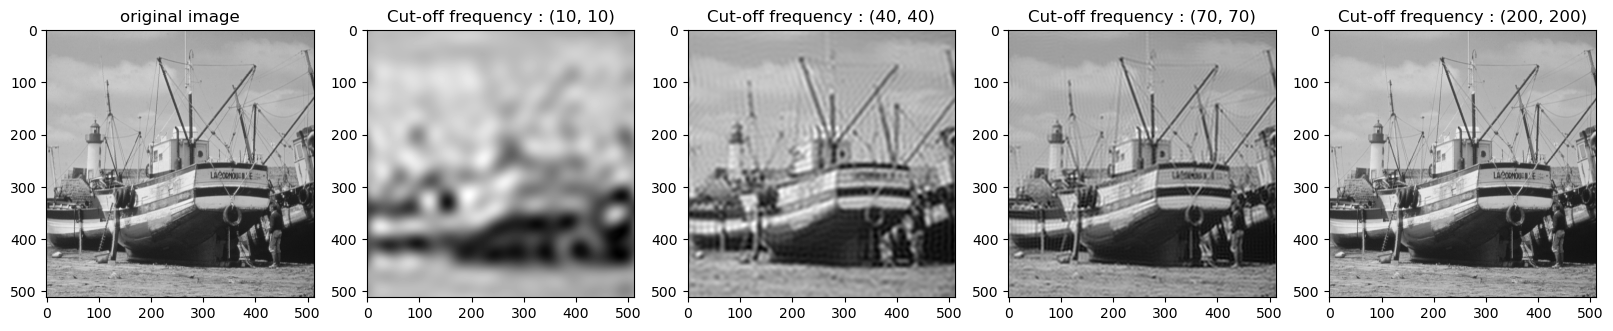

In [22]:

cut_off = [(10,10),(40,40),(70,70),(200,200)]
num_images = len(cut_off)
axis = plt.subplots(1,num_images+1,figsize=(20,20))[1]
#show the original image
axis[0].imshow(X, cmap='gray')
axis[0].set_title("original image")
for x in cut_off:
    Result = ideal_lowpass_filter(X,x)
    axis[cut_off.index(x)+1].imshow(Result, cmap='gray')
    axis[cut_off.index(x)+1].set_title("Cut-off frequency : "+str(x))


2-b As the cutoff frequency increases the image seems to be much clearer 

4\. Let $\mathbf{H} \in \mathbb{R}^{M_2\times N_2}$ be a 2-D Gaussian kernel, obtained as the outer product of two 1-D Gaussian windows $\mathbf{w}_y \in \mathbb{R}^{M_2}$ and $\mathbf{w}_x \in \mathbb{R}^{N_2}$, of standard deviation $\sigma_y = 10$ and $\sigma_x = 10$, respectively:

\begin{equation}
    \mathbf{H} = \mathbf{w}_y \mathbf{w}_x^T.
\end{equation}

Let $M = M_1+M_2-1$ and $N =  N_1+N_2-1$. From the discrete convolution theorem, the linear convolution between $\mathbf{H}$ and $\mathbf{X}$ can be computed as follows

\begin{equation}
    \mathbf{X} \star \mathbf{H} = \mathcal{F}^{-1} \Big( \mathcal{F}\big(P_1(\mathbf{X})\big) \odot \mathcal{F}\big(P_2(\mathbf{H})\big) \Big) \in \mathbb{R}^{M\times N},
\end{equation}

where $P_i: \mathbb{R}^{M_i \times N_i} \rightarrow \mathbb{R}^{M \times N}$, $i \in \{1, 2\}$, are 0-padding operators, $\odot$ is the Hadamard (= term-wise) product, $\mathcal{F}^{-1}$ is the 2D discrete inverse Fourier transform.

Compute and display $\mathbf{X} \star \mathbf{H}$, for $M_2 = N_2 = 10$. What do you observe?

> Hint: 
> - the usual 0-padding procedure in image space consists in appending trailing zeros. For instance (in 1D), 0-padding a vector $\mathbf{x} \in \mathbb{R}^N_1$ to the size $N>N_1$ corresponds to creating the vector
\begin{bmatrix}
\mathbf{x} \\
\mathbf{0}_{N-N_1}
\end{bmatrix}
> - since the input images are real, $\mathcal{F}(\mathbf{x})$ and $\mathcal{F}(\mathbf{h})$ are Hermitian symmetric. In this case, a more efficient version of `np.fft.fft2` can be used, computing only quarter of the Fourier coefficients (half of the Fourier coefficients in each direction): [`np.fft.rfft2`](https://numpy.org/doc/stable/reference/generated/numpy.fft.rfft2.html?highlight=rfft#numpy.fft.rfft2). Its inverse, [`np.fft.irfft2`](https://numpy.org/doc/stable/reference/generated/numpy.fft.irfft2.html#numpy.fft.irfft2), also ensures that the output is real;
> - the 2D Gaussian window can be generated as the outer product of two 1D Gaussian windows (one window for each dimension);
> - you can take a look at [scipy.signal.windows.gaussian](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.windows.gaussian.html#scipy.signal.windows.gaussian) and [np.newaxis](https://numpy.org/doc/stable/reference/constants.html?highlight=newaxis#numpy.newaxis) (or `np.reshape` or built-in `np.outer`).

**Answer:**

Text(0.5, 1.0, 'Gaussian window H')

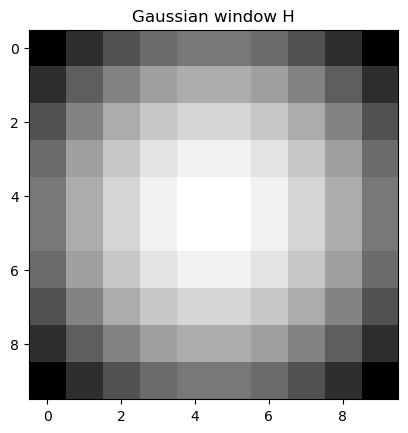

In [23]:
M2,N2 = 10,10
M1,N1 = X.shape

# Define the standard deviation (sigma) and the window size
sigma = 10
window_size = 10

# Create a 1D Gaussian window
x = np.linspace(-window_size // 2, window_size // 2, window_size)

W_x =np.array(np.exp(-x**2 / (2 * sigma**2)) / (sigma * np.sqrt(2 * np.pi))).reshape(window_size,1)
W_y = np.array(np.exp(-x**2 / (2 * sigma**2)) / (sigma * np.sqrt(2 * np.pi))).reshape(window_size,1)

H = W_x @ W_y.T
# 2D Gaussian window
plt.imshow(H, cmap='gray')
plt.title("Gaussian window H")


Text(0.5, 1.0, 'Padded image')

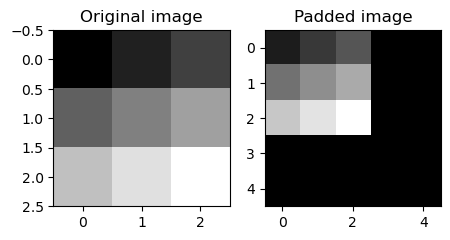

In [24]:
def padding(X,M,N):
    X_padded = np.zeros((M,N))
    X_padded[:X.shape[0],:X.shape[1]] = X
    return(X_padded)

plt.figure(figsize=(5,5))
axis = plt.subplot(1,2,1)
exemple = np.array([[1,2,3],[4,5,6],[7,8,9]])
axis.imshow(exemple, cmap='gray')
axis.set_title("Original image")
axis = plt.subplot(1,2,2)
exemple_padded = padding(exemple,5,5)
axis.imshow(exemple_padded, cmap='gray')
axis.set_title("Padded image")


Text(0.5, 1.0, 'Padded H')

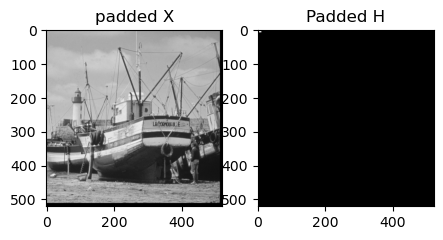

In [26]:
X_padded = padding(X,M1+M2-1,N1+N2-1)
H_padded = padding(H,M1+M2-1,N1+N2-1)
plt.figure(figsize=(5,5))
axis = plt.subplot(1,2,1)
axis.imshow(X_padded, cmap='gray')
axis.set_title("padded X")
axis = plt.subplot(1,2,2)
axis.imshow(H_padded, cmap='gray')
axis.set_title("Padded H")


Text(0.5, 1.0, 'Convolution of X and H')

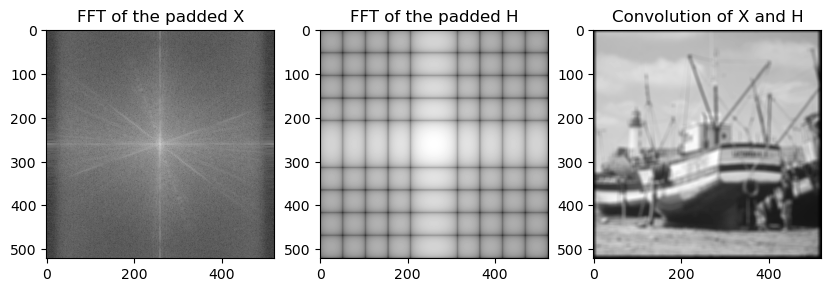

In [27]:
plt.figure(figsize=(10,10))
axis = plt.subplot(1,3,1)
X_f = np.fft.fft2(X_padded)
X_f_shifted = np.fft.fftshift(X_f)
X_f_shifted = np.abs(X_f_shifted)**2
axis.imshow(np.log(X_f_shifted), cmap='gray')
axis.set_title("FFT of the padded X")

axis = plt.subplot(1,3,2)
H_f = np.fft.fft2(H_padded)
H_f_shifted = np.fft.fftshift(H_f)
H_f_shifted = np.abs(H_f_shifted)**2
axis.imshow(np.log(H_f_shifted), cmap='gray')
axis.set_title("FFT of the padded H")

conv_X_H = np.fft.irfft2(np.fft.rfft2(X_padded)*np.fft.rfft2(H_padded))
axis = plt.subplot(1,3,3)
axis.imshow(conv_X_H, cmap='gray')
axis.set_title("Convolution of X and H")


The application of a Gaussian window to the image using convolution product adds blur to the image ,it gives the impression that we applyed a low pass filter to the image. Analyzing the two images of the shifted Fourier transform of the image and the Gaussian filter, it is evident that their multiplication tends to retain the low-frequency components while attenuating the high-frequency ones in the image. This operation effectively acts as a low-pass filter. This is especially noticeable because the highest values of the padded Fourier transform of the Gaussian filter are centered around the center.

We noticed also that there is some missing pixels across the edges of the image which is linked to the padding operator we applied to the image and the window .